# **Pré-processamento de dados do Dataset** 
### Aplicando técnicas de pré-processamento ao dataset "enhanced student habits performance" disponível em https://www.kaggle.com/datasets/aryan208/student-habits-and-academic-performance-dataset/data

# Importando bibliotecas e lendo o dataset

In [21]:
import pandas as pd
import numpy as np
import os
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split


df=pd.read_csv("enhanced_student_habits_performance_dataset.csv")
display(df)

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,110197,17,Female,Engineering,3.300000,2.900000,2.000000,No,97.600000,7.900000,...,9.200000,Cafe,No,High,7.0,2.0,10.000000,Auditory,10.000000,87.000000
1,110198,24,Female,Arts,0.500000,1.800000,0.400000,Yes,77.600000,6.500000,...,4.000000,Quiet Room,No,High,1.0,2.0,10.000000,Auditory,4.000000,87.000000
2,110199,26,Other,Computer Science,5.086285,1.100000,3.700000,Yes,97.900000,7.500000,...,10.100000,Library,Yes,Medium,4.0,7.0,8.000000,Auditory,2.400000,97.000000
3,110200,24,Male,Psychology,7.000000,0.900000,2.800000,No,42.000000,7.800000,...,11.900000,Dorm,Yes,High,9.0,6.0,9.000000,Visual,9.700000,96.000000
4,110201,19,Female,Engineering,2.500000,4.300000,1.500000,No,73.100000,8.400000,...,9.900000,Dorm,Yes,Low,6.0,2.0,10.000000,Visual,3.500000,76.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96762,206959,20,Female,Computer Science,2.392278,3.502490,1.599105,Yes,84.421239,6.759879,...,7.444973,Quiet Room,No,Low,8.0,2.0,5.844354,Visual,3.791018,48.221368
96763,206960,19,Female,Mathematics,5.309346,3.986706,2.561607,Yes,54.885070,4.686597,...,6.873439,Co-Learning Group,Yes,High,4.0,9.0,2.358127,Auditory,4.406864,74.199274
96764,206961,23,Female,Engineering,5.400236,1.046150,2.881840,No,79.954647,6.977531,...,5.541867,Cafe,No,High,5.0,7.0,1.205754,Visual,7.890736,73.212803
96765,206962,19,Male,Biology,7.158733,4.104118,1.077657,Yes,60.668502,7.436312,...,7.379344,Co-Learning Group,Yes,High,2.0,1.0,4.393213,Visual,1.842059,54.685937


# Valores Faltantes
Verificando se existem colunas com valores faltantes

In [22]:
valores_faltantes=df.isnull().sum()

valores_faltantes=valores_faltantes[valores_faltantes>0]
if valores_faltantes.empty:
    print("Não foram encontrados valores faltantes.")
else:
    print("Colunas com valores faltantes:\n",valores_faltantes)

Colunas com valores faltantes:
 parental_education_level    4596
parental_support_level         1
motivation_level               1
exam_anxiety_score             1
learning_style                 2
time_management_score          2
exam_score                     2
dtype: int64


# Distribuição de Classes
Plotando a distribuição relativa ao "Dropout risk"

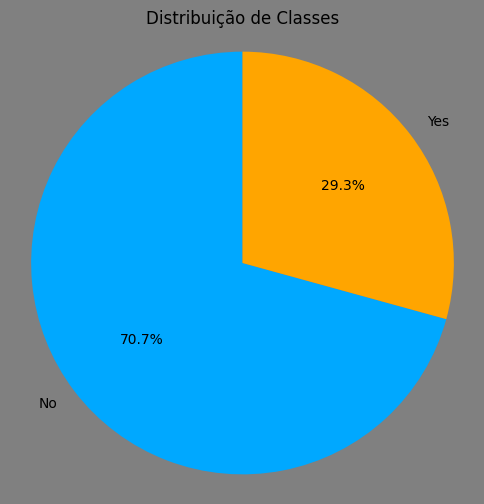

In [23]:
count = df['dropout_risk'].value_counts()

fig, ax = plt.subplots(figsize=(6,6), facecolor='grey')
colors = ['#00A8FF', '#FFA500'] 
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribuição de Classes')
plt.axis('equal')
plt.show()


# Tipos de Dados
Verificando os tipos de dados de cada coluna

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96767 entries, 0 to 96766
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     96767 non-null  int64  
 1   age                            96767 non-null  int64  
 2   gender                         96767 non-null  object 
 3   major                          96767 non-null  object 
 4   study_hours_per_day            96767 non-null  float64
 5   social_media_hours             96767 non-null  float64
 6   netflix_hours                  96767 non-null  float64
 7   part_time_job                  96767 non-null  object 
 8   attendance_percentage          96767 non-null  float64
 9   sleep_hours                    96767 non-null  float64
 10  diet_quality                   96767 non-null  object 
 11  exercise_frequency             96767 non-null  int64  
 12  parental_education_level       92171 non-null 

# Limpeza de Dados

In [25]:
# Descarta linhas que tiverem pelo menos uma coluna vazia ou com o valor NaN
display(df)
df = df.dropna()
display(df)

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,110197,17,Female,Engineering,3.300000,2.900000,2.000000,No,97.600000,7.900000,...,9.200000,Cafe,No,High,7.0,2.0,10.000000,Auditory,10.000000,87.000000
1,110198,24,Female,Arts,0.500000,1.800000,0.400000,Yes,77.600000,6.500000,...,4.000000,Quiet Room,No,High,1.0,2.0,10.000000,Auditory,4.000000,87.000000
2,110199,26,Other,Computer Science,5.086285,1.100000,3.700000,Yes,97.900000,7.500000,...,10.100000,Library,Yes,Medium,4.0,7.0,8.000000,Auditory,2.400000,97.000000
3,110200,24,Male,Psychology,7.000000,0.900000,2.800000,No,42.000000,7.800000,...,11.900000,Dorm,Yes,High,9.0,6.0,9.000000,Visual,9.700000,96.000000
4,110201,19,Female,Engineering,2.500000,4.300000,1.500000,No,73.100000,8.400000,...,9.900000,Dorm,Yes,Low,6.0,2.0,10.000000,Visual,3.500000,76.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96762,206959,20,Female,Computer Science,2.392278,3.502490,1.599105,Yes,84.421239,6.759879,...,7.444973,Quiet Room,No,Low,8.0,2.0,5.844354,Visual,3.791018,48.221368
96763,206960,19,Female,Mathematics,5.309346,3.986706,2.561607,Yes,54.885070,4.686597,...,6.873439,Co-Learning Group,Yes,High,4.0,9.0,2.358127,Auditory,4.406864,74.199274
96764,206961,23,Female,Engineering,5.400236,1.046150,2.881840,No,79.954647,6.977531,...,5.541867,Cafe,No,High,5.0,7.0,1.205754,Visual,7.890736,73.212803
96765,206962,19,Male,Biology,7.158733,4.104118,1.077657,Yes,60.668502,7.436312,...,7.379344,Co-Learning Group,Yes,High,2.0,1.0,4.393213,Visual,1.842059,54.685937


,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,110197,17,Female,Engineering,3.300000,2.900000,2.000000,No,97.600000,7.900000,...,9.200000,Cafe,No,High,7.0,2.0,10.000000,Auditory,10.000000,87.000000
1,110198,24,Female,Arts,0.500000,1.800000,0.400000,Yes,77.600000,6.500000,...,4.000000,Quiet Room,No,High,1.0,2.0,10.000000,Auditory,4.000000,87.000000
2,110199,26,Other,Computer Science,5.086285,1.100000,3.700000,Yes,97.900000,7.500000,...,10.100000,Library,Yes,Medium,4.0,7.0,8.000000,Auditory,2.400000,97.000000
3,110200,24,Male,Psychology,7.000000,0.900000,2.800000,No,42.000000,7.800000,...,11.900000,Dorm,Yes,High,9.0,6.0,9.000000,Visual,9.700000,96.000000
4,110201,19,Female,Engineering,2.500000,4.300000,1.500000,No,73.100000,8.400000,...,9.900000,Dorm,Yes,Low,6.0,2.0,10.000000,Visual,3.500000,76.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96761,206958,28,Female,Physics,0.702556,4.856442,0.007572,Yes,88.398542,7.220186,...,8.061226,Home,Yes,High,5.0,1.0,5.319910,Kinesthetic,3.912669,51.441001
96763,206960,19,Female,Mathematics,5.309346,3.986706,2.561607,Yes,54.885070,4.686597,...,6.873439,Co-Learning Group,Yes,High,4.0,9.0,2.358127,Auditory,4.406864,74.199274
96764,206961,23,Female,Engineering,5.400236,1.046150,2.881840,No,79.954647,6.977531,...,5.541867,Cafe,No,High,5.0,7.0,1.205754,Visual,7.890736,73.212803
96765,206962,19,Male,Biology,7.158733,4.104118,1.077657,Yes,60.668502,7.436312,...,7.379344,Co-Learning Group,Yes,High,2.0,1.0,4.393213,Visual,1.842059,54.685937


# Eliminação de Atributos
Eliminando algumas colunas dos conjunto de dados que não serão utilizadas

In [26]:
# Para a retirada de atributos, é só acrescentar os atributos os nomes dos atributos em aspas simples, como o 'student_id'

df_sem_atributos = df.drop(columns=['student_id', 'social_media_hours', 'netflix_hours','parental_support_level','learning_style','time_management_score','internet_quality','part_time_job','study_environment'])
display(df_sem_atributos.head(8))

print("Número de colunas:", df_sem_atributos.shape[1])

,age,gender,major,study_hours_per_day,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,mental_health_rating,...,semester,stress_level,dropout_risk,social_activity,screen_time,access_to_tutoring,family_income_range,motivation_level,exam_anxiety_score,exam_score
0,17,Female,Engineering,3.300000,97.6,7.9,Fair,0,Bachelor,2.6,...,4,8.8,Yes,4.0,9.2,No,High,2.0,10.0,87.0
1,24,Female,Arts,0.500000,77.6,6.5,Fair,6,Master,3.1,...,8,2.4,No,3.0,4.0,No,High,2.0,10.0,87.0
2,26,Other,Computer Science,5.086285,97.9,7.5,Good,7,PhD,3.6,...,5,8.3,No,0.0,10.1,Yes,Medium,7.0,8.0,97.0
3,24,Male,Psychology,7.000000,42.0,7.8,Fair,7,Master,6.7,...,7,4.4,No,5.0,11.9,Yes,High,6.0,9.0,96.0
4,19,Female,Engineering,2.500000,73.1,8.4,Good,4,PhD,6.8,...,1,5.7,No,1.0,9.9,Yes,Low,2.0,10.0,76.0
5,21,Other,Biology,5.200000,71.1,6.1,Fair,4,High School,2.8,...,1,7.2,No,3.0,7.3,Yes,Low,8.0,7.0,92.0
6,26,Other,Arts,1.500000,77.7,7.2,Good,1,Master,5.2,...,5,3.5,No,4.0,10.6,Yes,High,5.0,10.0,84.0
7,19,Female,Biology,6.500000,82.0,11.0,Good,1,High School,8.1,...,2,3.6,No,3.0,14.0,No,High,3.0,10.0,96.0


Número de colunas: 22


Não rodar este bloco por enquanto. Ideias futuras

In [85]:
"""
#Mesclando os dados de estresse e ansiedade, fazendo uma média e colocando em uma nova coluna 'stress_exam_combined'
df["stress_exam_combined"] = (df["stress_level"] + df["exam_anxiety_score"]) / 2

#Retirando os atributos 'stress_level' e 'exam_anxiety_score' para deixar apenas a nova coluna 'stress_exam_combined'
df_sem_atributos = df.drop(columns=['stress_level', 'exam_anxiety_score'])
print(df[[ "stress_level", "exam_anxiety_score", "stress_exam_combined"]].head())
df_sem_atributos.head(8)
"""

'\n#Mesclando os dados de estresse e ansiedade, fazendo uma média e colocando em uma nova coluna \'stress_exam_combined\'\ndf["stress_exam_combined"] = (df["stress_level"] + df["exam_anxiety_score"]) / 2\n\n#Retirando os atributos \'stress_level\' e \'exam_anxiety_score\' para deixar apenas a nova coluna \'stress_exam_combined\'\ndf_sem_atributos = df.drop(columns=[\'stress_level\', \'exam_anxiety_score\'])\nprint(df[[ "stress_level", "exam_anxiety_score", "stress_exam_combined"]].head())\ndf_sem_atributos.head(8)\n'

# Transformação de Dados
Para esta fase, os atributos que não tem valor numérico são convertidos.

In [27]:
print("Tipos de dados antes da transformação: ")
print(df_sem_atributos.dtypes)

nao_numericos = df_sem_atributos.select_dtypes(include='object').columns.to_list()
numericos = df_sem_atributos.select_dtypes(include=['int64','float64'])

print(f"Conlunas não numéricas: {nao_numericos}")
print(f"Conlunas numéricas: {list(numericos)}")

Tipos de dados antes da transformação: 
age                                int64
gender                            object
major                             object
study_hours_per_day              float64
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
mental_health_rating             float64
extracurricular_participation     object
previous_gpa                     float64
semester                           int64
stress_level                     float64
dropout_risk                      object
social_activity                  float64
screen_time                      float64
access_to_tutoring                object
family_income_range               object
motivation_level                 float64
exam_anxiety_score               float64
exam_score                       float64
dtype: object
Conlunas não numéricas: ['gender', 'major', 

In [28]:
# Codificação categórica ordinal
ordinal_encoder = OrdinalEncoder()
encoded = ordinal_encoder.fit_transform(df_sem_atributos[nao_numericos])

df_nao_numericos = pd.DataFrame(encoded,
                                columns=nao_numericos,
                                index=df_sem_atributos.index)

df_label = df_sem_atributos['dropout_risk']
df_separado = df_sem_atributos.drop(columns=['dropout_risk'] + nao_numericos)

df_pre_processado = pd.concat([df_separado, df_nao_numericos],axis=1)
display(df_pre_processado)


,age,study_hours_per_day,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,previous_gpa,semester,stress_level,social_activity,...,exam_anxiety_score,exam_score,gender,major,diet_quality,parental_education_level,extracurricular_participation,dropout_risk,access_to_tutoring,family_income_range
0,17,3.300000,97.600000,7.900000,0,2.600000,3.430000,4,8.800000,4.0,...,10.000000,87.000000,0.0,6.0,2.0,0.0,1.0,1.0,0.0,0.0
1,24,0.500000,77.600000,6.500000,6,3.100000,3.520000,8,2.400000,3.0,...,10.000000,87.000000,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0
2,26,5.086285,97.900000,7.500000,7,3.600000,3.600000,5,8.300000,0.0,...,8.000000,97.000000,2.0,3.0,3.0,5.0,1.0,0.0,1.0,3.0
3,24,7.000000,42.000000,7.800000,7,6.700000,3.940000,7,4.400000,5.0,...,9.000000,96.000000,1.0,10.0,2.0,3.0,1.0,0.0,1.0,0.0
4,19,2.500000,73.100000,8.400000,4,6.800000,2.910000,1,5.700000,1.0,...,10.000000,76.000000,0.0,6.0,3.0,5.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96761,28,0.702556,88.398542,7.220186,6,4.421723,1.123240,2,5.716620,7.0,...,5.319910,51.441001,0.0,9.0,4.0,5.0,1.0,1.0,1.0,0.0
96763,19,5.309346,54.885070,4.686597,5,3.587029,1.870105,7,6.565995,1.0,...,2.358127,74.199274,0.0,7.0,0.0,2.0,1.0,1.0,1.0,0.0
96764,23,5.400236,79.954647,6.977531,1,1.614561,1.296751,2,9.141313,0.0,...,1.205754,73.212803,0.0,6.0,0.0,5.0,0.0,1.0,0.0,0.0
96765,19,7.158733,60.668502,7.436312,2,6.365668,2.665971,1,6.123851,5.0,...,4.393213,54.685937,1.0,1.0,3.0,0.0,1.0,1.0,1.0,0.0


# **Modelo de Classificação Binária**
# Árvore de Decisão
Implementação da Árvore de decisão, buscando os melhores hiperparâmetros e utilizando o K Fold Estratificado para melhores resultados


- Melhores Hiperparâmetros

In [29]:
# Separa os dados/; X são as colunas preditoras e y é o rótulo (dropout_risk)
X = df_pre_processado.drop(columns=["dropout_risk"])
y = df_pre_processado["dropout_risk"] # Rótulos (valores que queremos prever)

# Transforma os rótulos de texto ("No", "Yes") em números (0, 1)
label_enconder = LabelEncoder()
y_enconder = label_enconder.fit_transform(y)

# Divide o conjunto de dados em treino (80%) e teste (20%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria o modelo de árvore de decisão
tree_clf = tree.DecisionTreeClassifier(random_state=42)

# Define os hiperparâmetros que serão testados no GridSearch
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Usa GridSearchCV para encontrar a melhor combinação de hiperparâmetros usando validação cruzada (cv=5)
grid = GridSearchCV(estimator=tree_clf, param_grid=parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Obtém os melhores hiperparâmetros encontrados
best_params = grid.best_params_
print("Melhores hiperparâmetros:", best_params)

# Cria um novo modelo usando os melhores hiperparâmetros
best_tree = tree.DecisionTreeClassifier(**best_params, random_state=42)

Melhores hiperparâmetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


- Executando o modelo com kfold implementado

In [30]:
def arvore_decisão(df, atributos, nome_categoria, n_splits):
    X = df[atributos]

    y = df["dropout_risk"]
    label_enconder = LabelEncoder()
    y_enconder = label_enconder.fit_transform(y)
    
    # Configura a validação cruzada com 10 subdivisões estratificadas
    skf = StratifiedKFold(n_splits)

    # Armazenar métricas
    accuracy_scores = []
    f1_scores = []

    print(f"📊 Categoria: {nome_categoria}\n")
    # Para cada fold do StratifiedKFold
    for i,(train_index, test_index) in enumerate(skf.split(X,y_enconder)):
        # Separa os dados de teino e teste para esse fold
        X_train_fold = X.iloc[train_index]
        X_test_fold = X.iloc[test_index]
        y_train_fold = y_enconder[train_index]
        y_test_fold = y_enconder[test_index]

        # Treina o modelo com os dados do fold atual
        best_tree.fit(X_train_fold, y_train_fold)

        # Faz predições
        y_pred = best_tree.predict(X_test_fold)

        # Calcula as métricas
        accuracy = accuracy_score(y_test_fold, y_pred)
        f1 = f1_score(y_test_fold, y_pred, average='weighted')

        print(f"Fold {i + 1}:")
        print(f"Accuracy: {accuracy:.3f} F1: {f1:.3f}")
        print("------------------------''------------------------")

        accuracy_scores.append(accuracy)
        f1_scores.append(f1)

    # Resultados finais
    print(f"\nAcurácia média: {np.mean(accuracy_scores):.4f}")
    print(f"F1-score médio: {np.mean(f1_scores):.4f}\n")

    return accuracy_scores, f1_scores



In [31]:
accuracy_scores, f1_scores = arvore_decisão(df_pre_processado, X.columns, "Tudo", 10)

📊 Categoria: Tudo

Fold 1:
Accuracy: 0.909 F1: 0.902
------------------------''------------------------
Fold 2:
Accuracy: 0.996 F1: 0.996
------------------------''------------------------
Fold 3:
Accuracy: 0.980 F1: 0.980
------------------------''------------------------
Fold 4:
Accuracy: 0.997 F1: 0.997
------------------------''------------------------
Fold 5:
Accuracy: 0.996 F1: 0.996
------------------------''------------------------
Fold 6:
Accuracy: 0.996 F1: 0.996
------------------------''------------------------
Fold 7:
Accuracy: 0.997 F1: 0.997
------------------------''------------------------
Fold 8:
Accuracy: 0.996 F1: 0.996
------------------------''------------------------
Fold 9:
Accuracy: 0.996 F1: 0.996
------------------------''------------------------
Fold 10:
Accuracy: 0.997 F1: 0.997
------------------------''------------------------

Acurácia média: 0.9861
F1-score médio: 0.9854



# Gráfico Erro x Acurácia

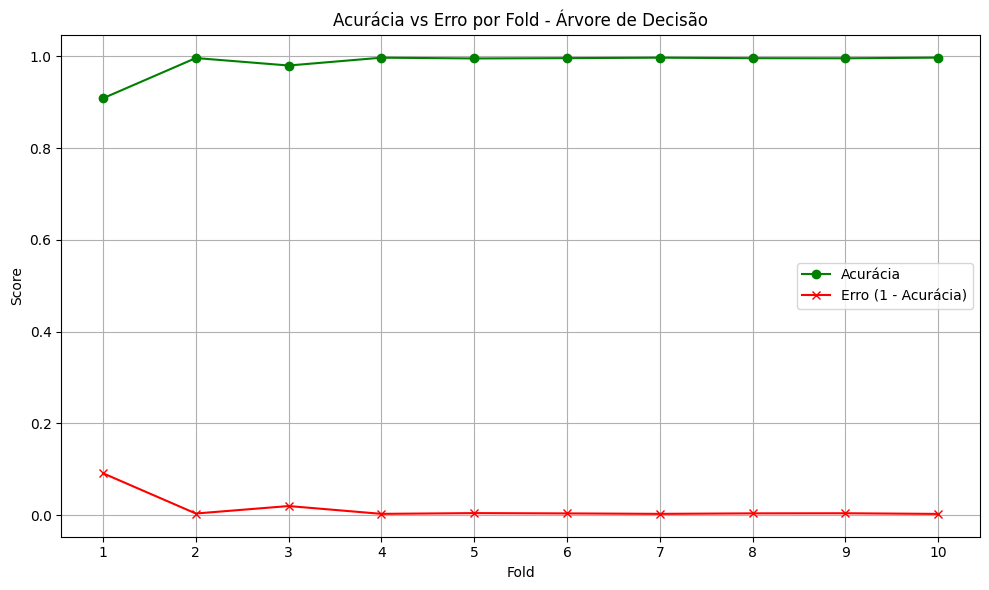

In [32]:
# Número dos folds (1 a 10)
folds = list(range(1, len(accuracy_scores) + 1))

# Erro = 1 - acurácia
error_scores = [1 - acc for acc in accuracy_scores]

# Cria o gráfico
plt.figure(figsize=(10, 6))
plt.plot(folds, accuracy_scores, marker='o', label='Acurácia', color='green')
plt.plot(folds, error_scores, marker='x', label='Erro (1 - Acurácia)', color='red')

# Adiciona detalhes ao gráfico
plt.title('Acurácia vs Erro por Fold - Árvore de Decisão')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.xticks(folds)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico Erro x F1-Score

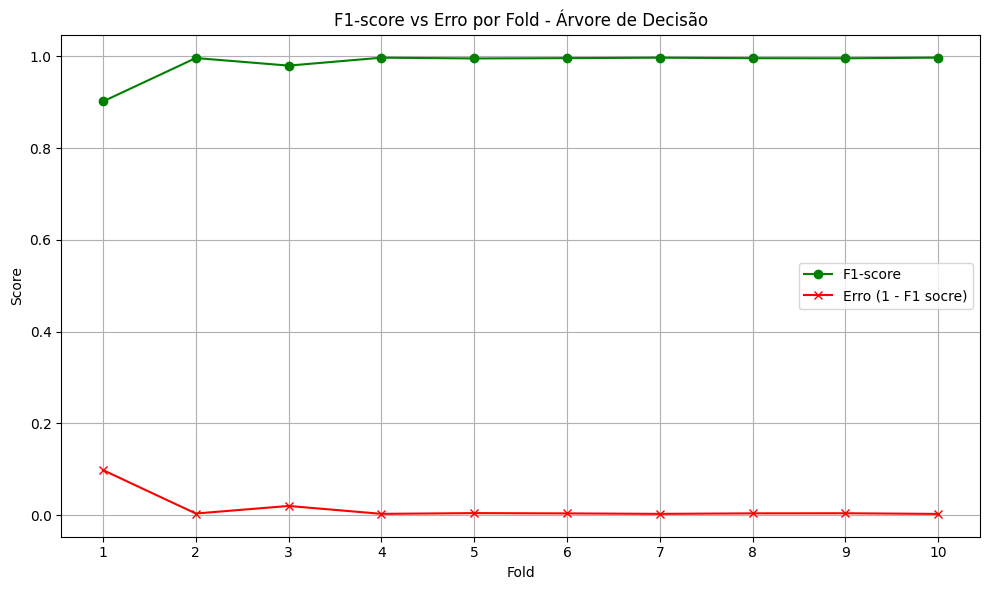

In [33]:
folds = list(range(1, len(f1_scores) + 1))

# Erro = 1 - acurácia
error_scores = [1 - f1 for f1 in f1_scores]

# Cria o gráfico
plt.figure(figsize=(10, 6))
plt.plot(folds, f1_scores, marker='o', label='F1-score', color='green')
plt.plot(folds, error_scores, marker='x', label='Erro (1 - F1 socre)', color='red')

# Adiciona detalhes ao gráfico
plt.title('F1-score vs Erro por Fold - Árvore de Decisão')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.xticks(folds)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Verificando importância de cada variável


,Variável,Importância
6,previous_gpa,0.440032
16,diet_quality,0.174365
12,exam_anxiety_score,0.138266
8,stress_level,0.073784
11,motivation_level,0.072035
13,exam_score,0.050151
9,social_activity,0.024164
7,semester,0.011797
1,study_hours_per_day,0.003946
5,mental_health_rating,0.003268


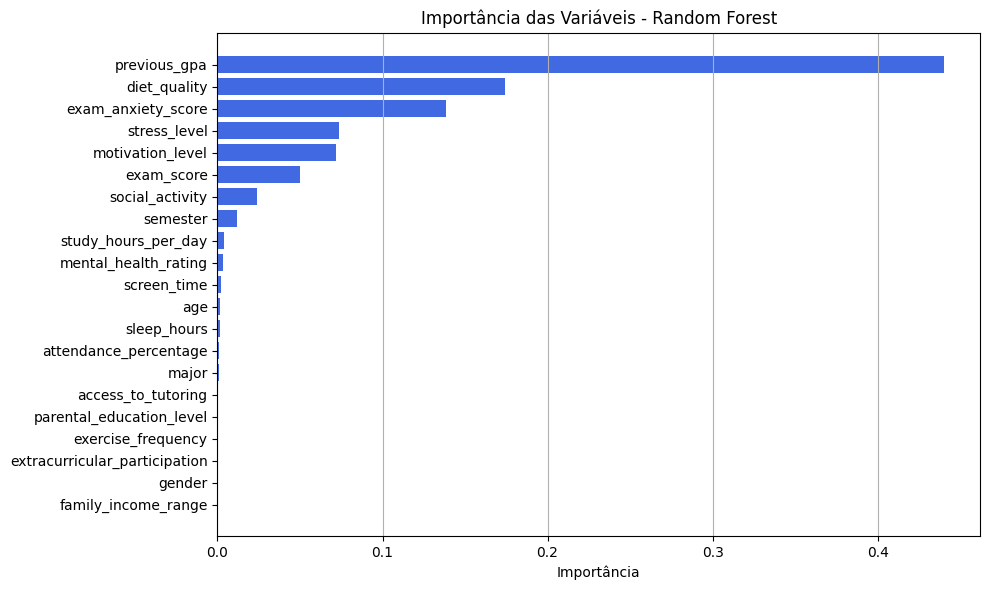

In [34]:
# Treina o modelo best_tree com todos os dados para extrair as importâncias
best_tree.fit(X, y_enconder)

# Extrai as importâncias das variáveis
importances = best_tree.feature_importances_
feature_names = X.columns

# DataFrame com os dados de importância
importances_df = pd.DataFrame({
    'Variável': feature_names,
    'Importância': importances
}).sort_values(by='Importância', ascending=False)

# Tabela de importâncias
display(importances_df)

# Gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Variável'], importances_df['Importância'], color='royalblue')
plt.xlabel('Importância')
plt.title('Importância das Variáveis - Random Forest')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Tabela de correlação em formato de heatmap

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de correlação
corr = df_pre_processado.corr()

# Configura o tamanho da figura
plt.figure(figsize=(12, 8))

# Cria o heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Mapa de Correlação entre as Variáveis", fontsize=16)
plt.show()


ModuleNotFoundError: No module named 'seaborn'

# Plotagem de árvore de decisão simplificada

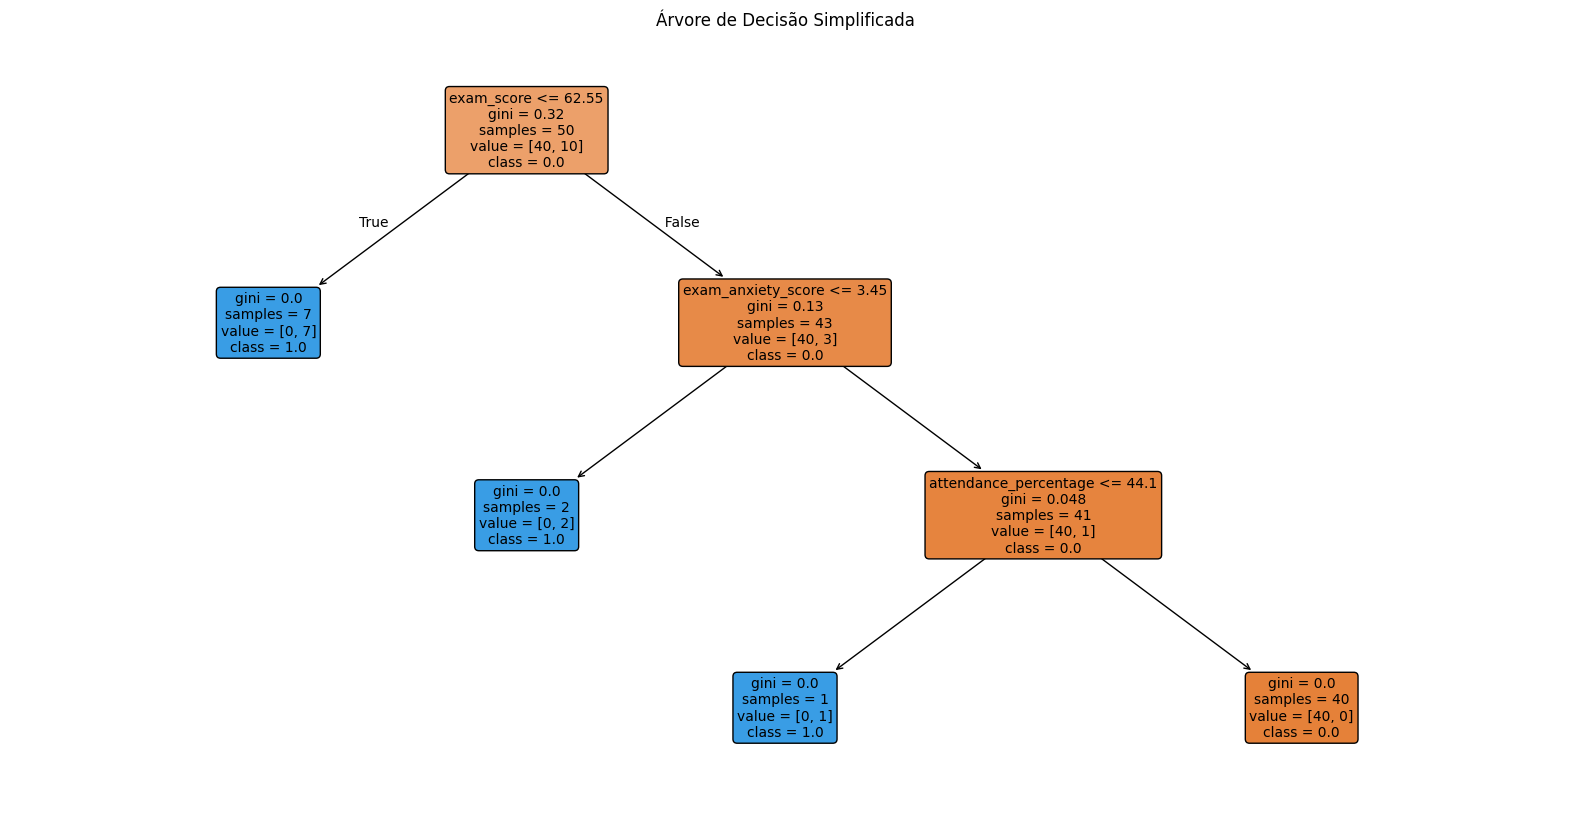

In [37]:

sample = df_pre_processado.sample(n=50, random_state=42)

X_sample = sample.drop(columns=["dropout_risk"])
y_sample = sample["dropout_risk"]

# Cria o modelo de árvore de decisão com profundidade reduzida
simplified_tree = tree.DecisionTreeClassifier(max_depth=3, random_state=42)

# Treina o modelo na amostra
simplified_tree.fit(X_sample, y_sample)

# Plota a árvore
plt.figure(figsize=(20, 10))
tree.plot_tree(
    simplified_tree,
    feature_names=X_sample.columns,
    class_names=[str(cls) for cls in np.unique(y_sample)],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árvore de Decisão Simplificada")
plt.show()


0: Representa alunos que não estão em risco de evasão

1: Representa alunos que estão em risco de evasão

# Avaliação do impacto de categoria no resultado do atributo alvo

In [38]:

saude_mental = ['mental_health_rating', 'stress_level', 'exam_anxiety_score']
saude_fisica = ['exercise_frequency', 'sleep_hours', 'diet_quality']
desempenho_academico = ['exam_score', 'previous_gpa', 'extracurricular_participation']
contexto_familiar = ['family_income_range', 'parental_education_level']
habilidades_pessoais = ['motivation_level', 'social_activity', 'screen_time']

In [95]:
def avaliar_categoria(df, atributos, nome_categoria):
    from sklearn.metrics import accuracy_score, f1_score
    from sklearn.model_selection import train_test_split

    X = df[atributos]
    y = df["dropout_risk"]

    # Codificação
    X_encoded = OrdinalEncoder().fit_transform(X)
    y_encoded = LabelEncoder().fit_transform(y)

    # Treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

    modelo = tree.DecisionTreeClassifier(random_state=42)
    modelo.fit(X_train, y_train)

    # Predição e métricas
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"📊 Categoria: {nome_categoria}")
    print(f"   - Acurácia: {acc:.4f}")
    print(f"   - F1-score: {f1:.4f}\n")

    return acc, f1

📊 Categoria: Saúde Mental

Fold 1:
Accuracy: 0.760 F1: 0.677
------------------------''------------------------
Fold 2:
Accuracy: 0.914 F1: 0.911
------------------------''------------------------
Fold 3:
Accuracy: 0.972 F1: 0.972
------------------------''------------------------
Fold 4:
Accuracy: 0.972 F1: 0.973
------------------------''------------------------
Fold 5:
Accuracy: 0.973 F1: 0.973
------------------------''------------------------

Acurácia média: 0.9182
F1-score médio: 0.9013

📊 Categoria: Saúde Física

Fold 1:
Accuracy: 0.832 F1: 0.802
------------------------''------------------------
Fold 2:
Accuracy: 0.923 F1: 0.919
------------------------''------------------------
Fold 3:
Accuracy: 0.986 F1: 0.986
------------------------''------------------------
Fold 4:
Accuracy: 0.984 F1: 0.984
------------------------''------------------------
Fold 5:
Accuracy: 0.988 F1: 0.988
------------------------''------------------------

Acurácia média: 0.9426
F1-score médio: 0.9358



,Acurácia,F1-score
Saúde Mental,0.909785,0.909785
Saúde Física,0.939196,0.939196
Desempenho Acadêmico,0.967877,0.967877
Contexto Familiar,0.717281,0.717281
Habilidades Pessoais,0.903999,0.903999


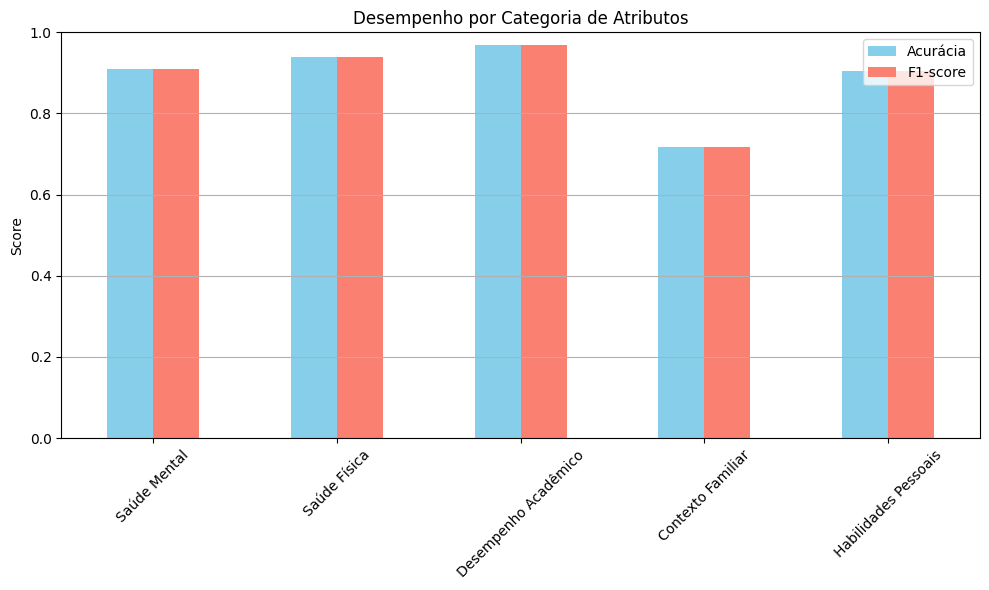

In [ ]:
resultados = {}

resultados["Saúde Mental"] = np.mean(arvore_decisão( df_pre_processado, saude_mental, "Saúde Mental",5))
resultados["Saúde Física"] = np.mean(arvore_decisão( df_pre_processado, saude_fisica, "Saúde Física",5))
resultados["Desempenho Acadêmico"] = np.mean(arvore_decisão( df_pre_processado, desempenho_academico, "Desempenho Acadêmico",5))
resultados["Contexto Familiar"] = np.mean(arvore_decisão(df_pre_processado, contexto_familiar, "Contexto Familiar",5))
resultados["Habilidades Pessoais"] = np.mean(arvore_decisão(df_pre_processado, habilidades_pessoais, "Habilidades Pessoais",5))

# Convertendo resultados para DataFrame
df_resultados = pd.DataFrame(resultados, index=["Acurácia", "F1-score"]).T

# Gráfico
df_resultados.plot(kind='bar', figsize=(10,6), color=["skyblue", "salmon"])
plt.title("Desempenho por Categoria de Atributos")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()